### **Introduction to the Keras Library**


### Keras 
- High level deep learning API that lets you easily build, train and evaluate neural networks



#### Train a model in 3 steps:

1.**Define model, specify:**

- architecture
- number of neurons
- layers
- type of activation function


2. **Compile the model, specify:**

- optimizers
- metrics
- loss function

3. **Fit the model, specify:**

- epochs (number of iterations of the dataset in backpropagation)
- batch size (the data is fed in layers / batches; not all at once)

In [ ]:
from tensorflow import keras
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_moons
import numpy as np

# Part one!

**Building Neural Networks**

In [ ]:
X, y = make_moons(5000, noise =0.2)

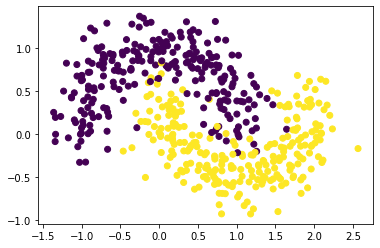

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)

**Build a model with layers**

In [ ]:
m = Sequential([ 
                Dense(units=4, activation='relu', input_shape=(2,)),   #constructor
                Dense(units = 1, activation='sigmoid')])

**Choose a loss function and evaluation metric**

In [ ]:
m.compile(optimizer='rmsprop',       # loss function: for regression take: mse, binary classification: binary_crossentropy, multiclass classification: categorical_crossentropy
          loss='binary_crossentropy', #
          metrics=['accuracy'])

**Fit the model**

In [ ]:
print(m.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
None


**Plot learning curve**

In [ ]:
# train the model
h = m.fit( X, y, epochs=1000, batch_size = 50, validation_split = 0.20) # batch_size hyperparameter that defines number of samples to work 
                                                                       # it defines number of times that the learning algorithm will work through entire datase
                                                                       #epochs is when the entire dataset is passed forward and backward through the neural network 

Epoch 1/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.1453 - accuracy: 0.9578 - val_loss: 0.1315 - val_accuracy: 0.9640
Epoch 2/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.1432 - accuracy: 0.9610 - val_loss: 0.1305 - val_accuracy: 0.9660
Epoch 3/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.1414 - accuracy: 0.9597 - val_loss: 0.1295 - val_accuracy: 0.9660
Epoch 4/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.1397 - accuracy: 0.9605 - val_loss: 0.1280 - val_accuracy: 0.9650
Epoch 5/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.1383 - accuracy: 0.9620 - val_loss: 0.1267 - val_accuracy: 0.9650
Epoch 6/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9615 - val_loss: 0.1257 - val_accuracy: 0.9670
Epoch 7/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.1353 - accuracy: 0.9628 - val_loss: 0.1246 - val_accuracy: 0.9660
Epoch 

**Evaluate !**

In [ ]:
score = m.evaluate(X, y, batch_size=50)
print(score)

100/100 [==============================] - 0s 925us/step - loss: 0.0881 - accuracy: 0.9672
[0.08805114030838013, 0.967199981212616]


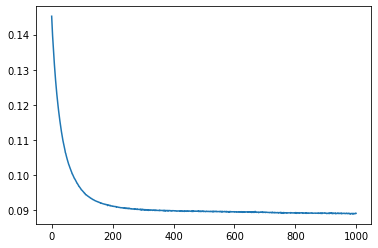

In [ ]:
#plot the learning curve
plt.plot(h.history['loss'])

Text(0, 0.5, 'accuracy')

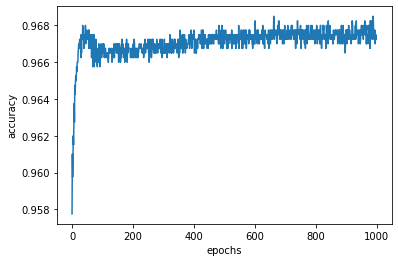

In [ ]:
plt.plot(h.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [ ]:
ypred = m.predict(X)

# Part two !

##Working with MNIST Data



### Get Data

In [ ]:
from tensorflow.keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


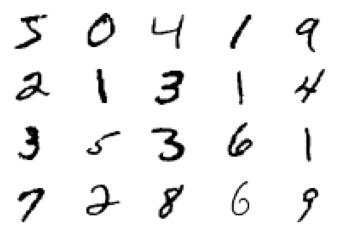

In [ ]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

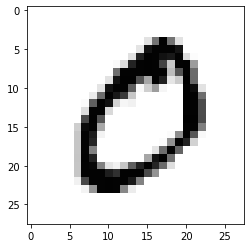

In [ ]:
plt.imshow(xtrain[1], cmap=plt.cm.Greys)

In [ ]:
# we need to reshape the data (60000, 28*28)
xtrain_flatten = xtrain.reshape((60000, 28*28))
xtrain.shape, xtrain_flatten.shape

((60000, 28, 28), (60000, 784))

In [ ]:
xtest_flatten = xtest.reshape((10000, 28*28))
xtest.shape, xtest_flatten.shape

((10000, 28, 28), (10000, 784))

In [ ]:

ytrain_one_hot = keras.utils.to_categorical(ytrain)
ytrain.shape, ytrain_one_hot.shape

((60000,), (60000, 10))

### Build a model with layers

In [ ]:
model = keras.models.Sequential([
    
    keras.layers.Dense(
        units=64,                                  # units=neurons="number of output features"
        activation=keras.activations.relu,
        input_shape=(28*28, )                      # number of features of your input data
    ), 
    # activation(np.dot(X, w))
    keras.layers.Dense(
        units=32,                                  # units=neurons="number of output features"
        activation=keras.activations.relu,
    ),  
    # output layer
    keras.layers.Dense(
        units=10,                                  # binary classification output
        activation=keras.activations.softmax    
    )    
])

In [ ]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


### Choose a loss function and evaluation metric

In [ ]:
model.compile(
    # algorithm for numerical optimization
    optimizer=keras.optimizers.Adam(learning_rate=0.001), 
    # loss function to optimize
    loss=keras.losses.CategoricalCrossentropy(),                    # binary crossentropy = log loss 
    # evaluation metrics
    metrics=[keras.metrics.CategoricalAccuracy()]
)

### Fit the model

In [ ]:
results = model.fit(xtrain_flatten, ytrain_one_hot, 
              epochs=10,            # number of iterations through the complete dataset 
              batch_size=128,        # number of observation used for calculating the gradient
              validation_split=0.2  # 20% of the data is reserved for validation
)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 4.0205 - categorical_accuracy: 0.7025 - val_loss: 0.7945 - val_categorical_accuracy: 0.7964
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.6658 - categorical_accuracy: 0.8299 - val_loss: 0.5258 - val_categorical_accuracy: 0.8652
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4536 - categorical_accuracy: 0.8794 - val_loss: 0.4280 - val_categorical_accuracy: 0.9007
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3692 - categorical_accuracy: 0.9017 - val_loss: 0.3745 - val_categorical_accuracy: 0.9122
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3019 - categorical_accuracy: 0.9184 - val_loss: 0.3365 - val_categorical_accuracy: 0.9240
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2639 - categorical_accuracy: 0.9275 - val_loss: 0.3137 - val_categorical_accuracy: 0.9286
Epoc

### Evaluate the model

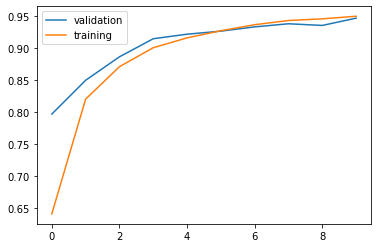

In [ ]:
# Optional: get fancy using the Tensorboard https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks

plt.plot(results.history['val_categorical_accuracy'], label='validation')
plt.plot(results.history['categorical_accuracy'], label='training')
plt.legend()

In [ ]:
import numpy as np
from sklearn import metrics

In [ ]:
# class probabilities
y_pred = model.predict(xtest_flatten)


In [ ]:
# convert class probabilities into discrete classes
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
metrics.confusion_matrix(ytest, y_pred, normalize='true').round(2)

array([[0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.98, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.95, 0.02, 0.  , 0.  , 0.  , 0.01, 0.01, 0.  ],
       [0.  , 0.  , 0.01, 0.93, 0.  , 0.02, 0.  , 0.01, 0.02, 0.  ],
       [0.01, 0.  , 0.01, 0.  , 0.94, 0.  , 0.01, 0.  , 0.01, 0.04],
       [0.  , 0.  , 0.  , 0.04, 0.01, 0.88, 0.05, 0.  , 0.02, 0.01],
       [0.01, 0.  , 0.01, 0.  , 0.01, 0.  , 0.96, 0.  , 0.01, 0.  ],
       [0.  , 0.01, 0.02, 0.01, 0.  , 0.  , 0.  , 0.93, 0.01, 0.03],
       [0.01, 0.  , 0.02, 0.03, 0.01, 0.01, 0.01, 0.  , 0.91, 0.01],
       [0.  , 0.01, 0.  , 0.02, 0.03, 0.  , 0.  , 0.  , 0.02, 0.92]])

### Save the fitted model to the disk

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('trained_model.h5')

In [ ]:

old_model = load_model('trained_model.h5')

In [ ]:
old_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
